In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

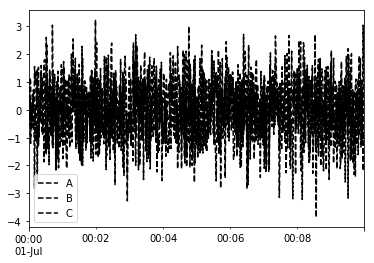

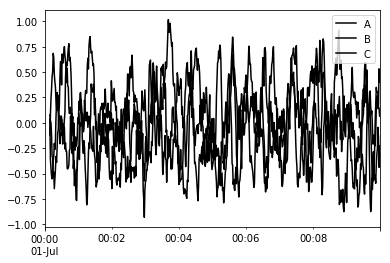

In [3]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [4]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.987342,0.210297,-0.505745
2016-07-01 00:00:02,0.492040,0.561342,-0.155126
2016-07-01 00:00:03,0.354959,0.698403,-0.473039
2016-07-01 00:00:04,0.302543,0.387444,-0.473121
2016-07-01 00:00:05,0.105271,0.156652,-0.442483
2016-07-01 00:00:06,0.049734,0.111160,-0.301736
2016-07-01 00:00:07,0.094814,0.197064,-0.175856
2016-07-01 00:00:08,0.006609,0.027321,-0.017668
2016-07-01 00:00:09,-0.106773,-0.043241,0.000941


In [5]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [6]:
df.head()

,A,B,C,D
2016-06-06,1.839693,-0.991822,1.090544,0.783217
2016-06-07,0.336620,-1.812001,-1.451165,-2.196667
2016-06-08,-1.214809,1.152148,-0.171913,0.673075
2016-06-09,-1.129815,-1.464290,-0.864621,-0.686034
2016-06-10,1.521758,-0.489086,-0.026368,1.089725


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112ecdb38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112ff4470>], dtype=object)

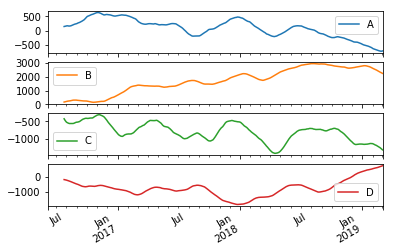

In [7]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [8]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.567907,1.139804,1.249132,0.911686


In [9]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,2.008003,-1.897823,0.364961,-0.315117
2016-06-08,1.659170,-1.815774,0.065796,-0.456870
2016-06-09,1.202300,-2.140822,-0.299942,-0.699255
2016-06-10,1.232529,-2.433667,-0.524658,-0.626741


In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 

# When might one vs. the other be appropriate?

In [ ]:
# EWMA
# Why use EWMA?

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting